# 一人あたり名目GDP

In [1]:
import pandas as pd

In [2]:
gdp_org = pd.read_excel("opendata/API_NY.GDP.PCAP.CD_DS2_en_excel_v2_2445346.xls","Data",header=3)

In [3]:
indicator_name = gdp_org["Indicator Name"].unique()[0]

In [4]:
countries = gdp_org.iloc[:,:2]

In [5]:
gdps = gdp_org.iloc[:,4:].stack(dropna=False).reset_index().rename(columns={"level_0":"country_index","level_1":"year",0:indicator_name})

In [6]:
ngdps = pd.merge(countries,gdps,left_index=True,right_on="country_index")
del ngdps["country_index"]
ngdps.rename(columns={indicator_name:"一人あたりGDP"},inplace=True)
ngdps

,Country Name,Country Code,year,一人あたりGDP
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN
...,...,...,...,...
16099,Zimbabwe,ZWE,2016,1464.583529
16100,Zimbabwe,ZWE,2017,1548.170056
16101,Zimbabwe,ZWE,2018,1683.740577
16102,Zimbabwe,ZWE,2019,1463.985910


In [7]:
# 最新年のGDPが全部NAなら削除
if ngdps.loc[ngdps.year==ngdps.year.max()]["一人あたりGDP"].isna().all(axis=0):
    ngdps.drop(ngdps.loc[ngdps.year==ngdps.year.max()].index,inplace=True)

In [8]:
latest_year = ngdps["year"].max()
latest_year

'2019'

In [9]:
# GDPの多い順に表示
ngdps.loc[ngdps.year==latest_year].sort_values("一人あたりGDP",ascending=False,na_position="last")

,Country Name,Country Code,year,一人あたりGDP
1584,Bermuda,BMU,2019,116889.952676
8721,Luxembourg,LUX,2019,114685.168424
8843,"Macao SAR, China",MAC,2019,84096.396311
2194,Switzerland,CHE,2019,81989.443512
6708,Ireland,IRL,2019,78778.994769
...,...,...,...,...
14272,Turkmenistan,TKM,2019,NaN
14455,Middle East & North Africa (IDA & IBRD countries),TMN,2019,NaN
15431,"Venezuela, RB",VEN,2019,NaN
15492,British Virgin Islands,VGB,2019,NaN


## 前年比

In [10]:
ngdps

,Country Name,Country Code,year,一人あたりGDP
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN
...,...,...,...,...
16098,Zimbabwe,ZWE,2015,1445.071062
16099,Zimbabwe,ZWE,2016,1464.583529
16100,Zimbabwe,ZWE,2017,1548.170056
16101,Zimbabwe,ZWE,2018,1683.740577


In [11]:
ngdps["前年比"] = ngdps["一人あたりGDP"].pct_change()
# 最初の年はNAにする
import numpy as np
ngdps.loc[ngdps.year==ngdps.year.min()] = np.nan
ngdps

,Country Name,Country Code,year,一人あたりGDP,前年比
0,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,1961,NaN,NaN
2,Aruba,ABW,1962,NaN,NaN
3,Aruba,ABW,1963,NaN,NaN
4,Aruba,ABW,1964,NaN,NaN
...,...,...,...,...,...
16098,Zimbabwe,ZWE,2015,1445.071062,0.007089
16099,Zimbabwe,ZWE,2016,1464.583529,0.013503
16100,Zimbabwe,ZWE,2017,1548.170056,0.057072
16101,Zimbabwe,ZWE,2018,1683.740577,0.087568


In [12]:
world_gdp = ngdps.loc[ngdps["Country Code"]=="WLD"]
world_gdp

,Country Name,Country Code,year,一人あたりGDP,前年比
15678,World,WLD,1961,463.831559,0.026751
15679,World,WLD,1962,489.549943,0.055448
15680,World,WLD,1963,516.618066,0.055292
15681,World,WLD,1964,554.556429,0.073436
15682,World,WLD,1965,591.721398,0.067017
15683,World,WLD,1966,628.742184,0.062565
15684,World,WLD,1967,655.877026,0.043157
15685,World,WLD,1968,693.904684,0.057980
15686,World,WLD,1969,749.728986,0.080450
15687,World,WLD,1970,803.997989,0.072385


In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


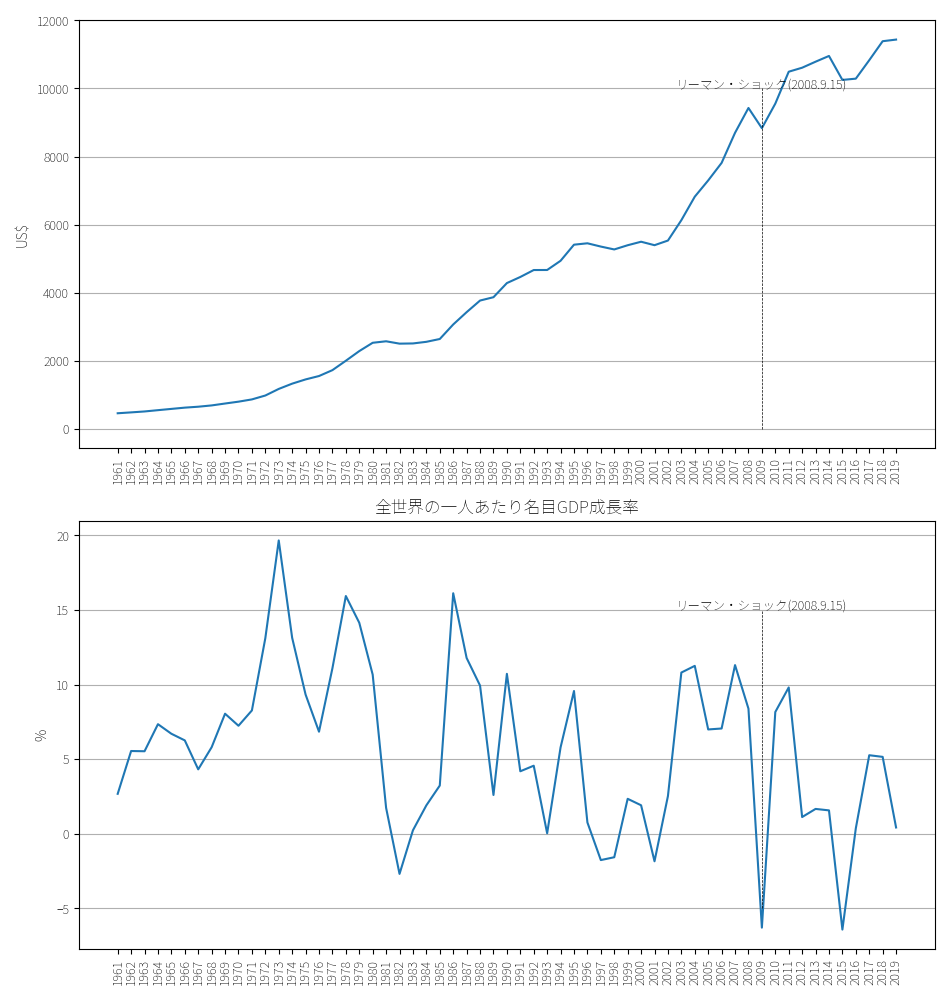

In [14]:
fig = plt.figure(figsize=(9.5,10))
plt.title("全世界の一人あたり名目GDP")
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("US$")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = world_gdp
plt.plot(world_gdp["year"], world_gdp["一人あたりGDP"])
plt.plot(["2009","2009"],[10,10000], 'k--', lw=0.5)
plt.text("2009",10000,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("全世界の一人あたり名目GDP成長率")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("%")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = world_gdp
plt.plot(world_gdp["year"], world_gdp["前年比"]*100)
plt.plot(["2009","2009"],[-5,15], 'k--', lw=0.5)
plt.text("2009",15,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")

plt.tight_layout()

## 国の読み込み

In [15]:
c_org = pd.read_excel("opendata/API_NY.GDP.PCAP.CD_DS2_en_excel_v2_2445346.xls","Metadata - Countries")

In [16]:
countries = c_org.dropna(subset=["Region","IncomeGroup"],how="any")
countries

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [17]:
regions = c_org.Region.dropna().unique()
regions

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [18]:
c_gdps = pd.merge(countries,ngdps,on="Country Code",how="inner").drop("TableName",axis=1)
#gdps.join(countries,on="Country Code",how="inner")

In [19]:
print(len(countries))
print(len(c_gdps["Country Name"].unique()))

217
217


## 世界TOP10

In [20]:
gdp_top10_c = pd.DataFrame(c_gdps.loc[c_gdps.year==latest_year].sort_values("一人あたりGDP", ascending=False).head(10)[["Country Code","Country Name"]])
c_gdps_top10 = c_gdps[c_gdps["Country Code"].isin(gdp_top10_c["Country Code"])]
c_gdps.iloc[gdp_top10_c.index]


,Country Code,Region,IncomeGroup,SpecialNotes,Country Name,year,一人あたりGDP,前年比
1474,BMU,North America,High income,NaN,Bermuda,2019,116889.952676,0.034228
6902,LUX,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Luxembourg,2019,114685.168424,-0.016880
7020,MAC,East Asia & Pacific,High income,On 20 December 1999 China resumed its exercise...,"Macao SAR, China",2019,84096.396311,-0.035686
2005,CHE,Europe & Central Asia,High income,NaN,Switzerland,2019,81989.443512,-0.010006
5368,IRL,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Ireland,2019,78778.994769,0.002007
8613,NOR,Europe & Central Asia,High income,NaN,Norway,2019,75419.634869,-0.077260
5545,ISL,Europe & Central Asia,High income,NaN,Iceland,2019,67084.083707,-0.080646
12035,USA,North America,High income,NaN,United States,2019,65297.517508,0.036527
10088,SGP,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Singapore,2019,65233.282439,-0.014436
9675,QAT,Middle East & North Africa,High income,NaN,Qatar,2019,62088.061828,-0.057960


<IPython.core.display.Javascript object>


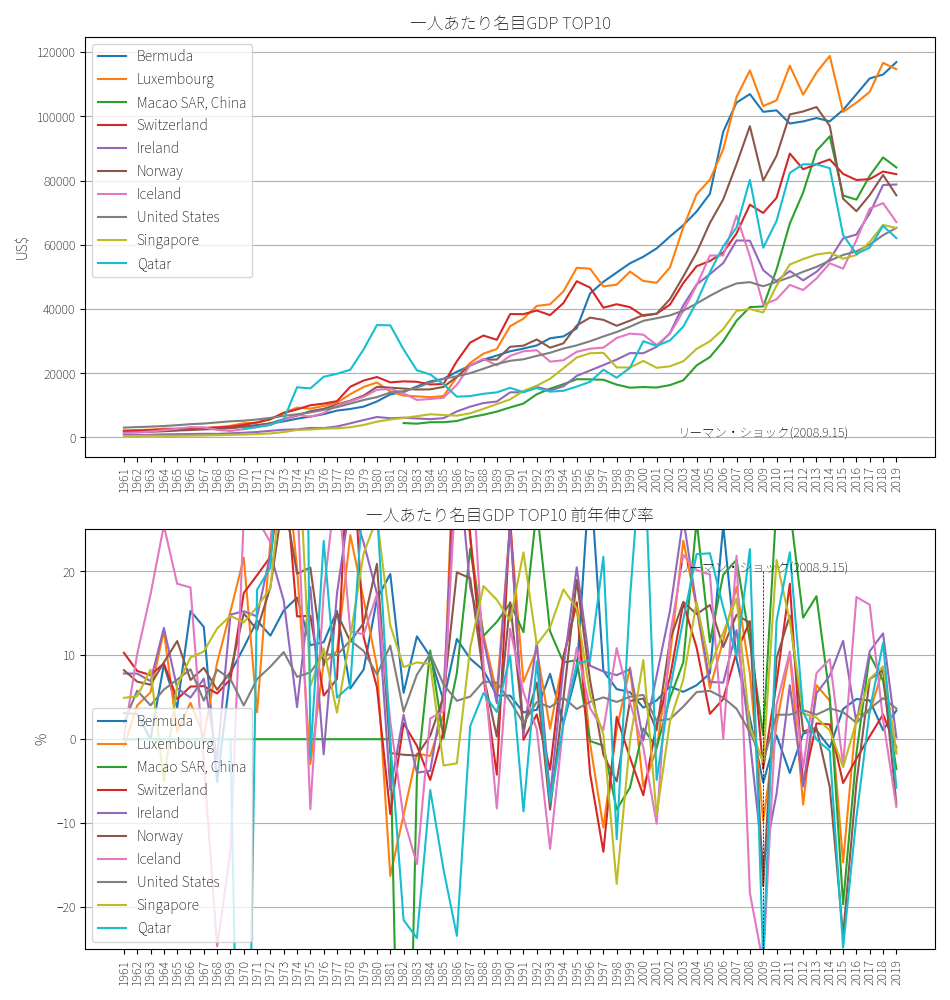

In [21]:
fig = plt.figure(figsize=(9.5,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.title("一人あたり名目GDP TOP10")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("US$")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = c_gdps_top10
years = chart_data.year.unique()
for c in gdp_top10_c["Country Name"]:
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"一人あたりGDP"],label=c)
plt.plot(["2009","2009"],[10,175], 'k--', lw=0.5)
plt.text("2009",175,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.legend()

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("一人あたり名目GDP TOP10 前年伸び率")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("%")
plt.yticks(fontsize=9)
plt.ylim(-25,25)
plt.grid(axis="y")
chart_data = c_gdps_top10
years = chart_data.year.unique()
for c in gdp_top10_c["Country Name"]:
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"前年比"]*100,label=c)
plt.plot(["2009","2009"],[-25,20], 'k--', lw=0.5)
plt.text("2009",20,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.legend()

plt.tight_layout()

## 日本

In [22]:
jpn_gdps = c_gdps.loc[c_gdps["Country Code"]=="JPN"]
jpn_gdps.tail(10)

,Country Code,Region,IncomeGroup,SpecialNotes,Country Name,year,一人あたりGDP,前年比
5831,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2010,44507.676386,0.089401
5832,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2011,48167.997268,0.082240
5833,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2012,48603.476650,0.009041
5834,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2013,40454.447458,-0.167664
5835,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2014,38109.412113,-0.057967
5836,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2015,34524.469861,-0.094070
5837,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2016,38761.818150,0.122735
5838,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2017,38386.511146,-0.009682
5839,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2018,39159.423563,0.020135
5840,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2019,40246.880128,0.027770


In [23]:
#for c in countries.loc[countries.IncomeGroup=="High income"][["Country Code","TableName"]]:
for c in countries.loc[countries.IncomeGroup=="High income"].itertuples():
    print(c[1],c[5])

ABW Aruba
AND Andorra
ARE United Arab Emirates
ATG Antigua and Barbuda
AUS Australia
AUT Austria
BEL Belgium
BHR Bahrain
BHS Bahamas, The
BMU Bermuda
BRB Barbados
BRN Brunei Darussalam
CAN Canada
CHE Switzerland
CHI Channel Islands
CHL Chile
CUW Curaçao
CYM Cayman Islands
CYP Cyprus
CZE Czech Republic
DEU Germany
DNK Denmark
ESP Spain
EST Estonia
FIN Finland
FRA France
FRO Faroe Islands
GBR United Kingdom
GIB Gibraltar
GRC Greece
GRL Greenland
GUM Guam
HKG Hong Kong SAR, China
HRV Croatia
HUN Hungary
IMN Isle of Man
IRL Ireland
ISL Iceland
ISR Israel
ITA Italy
JPN Japan
KNA St. Kitts and Nevis
KOR Korea, Rep.
KWT Kuwait
LIE Liechtenstein
LTU Lithuania
LUX Luxembourg
LVA Latvia
MAC Macao SAR, China
MAF St. Martin (French part)
MCO Monaco
MLT Malta
MNP Northern Mariana Islands
MUS Mauritius
NCL New Caledonia
NLD Netherlands
NOR Norway
NRU Nauru
NZL New Zealand
OMN Oman
PAN Panama
PLW Palau
POL Poland
PRI Puerto Rico
PRT Portugal
PYF French Polynesia
QAT Qatar
ROU Romania
SAU Saudi Arabia

In [24]:
## 主要国の定義
target_c = pd.DataFrame({"code":[
    "JPN",
    "USA",
    "GBR",
    "CAN",
    "FRA",
    "DEU",
    "CHE",
    "AUS",
    "NLD",
    "SWE",
    "CHN",
]})


In [25]:
chart_data = pd.merge(target_c,c_gdps, left_on="code",right_on="Country Code")

<IPython.core.display.Javascript object>


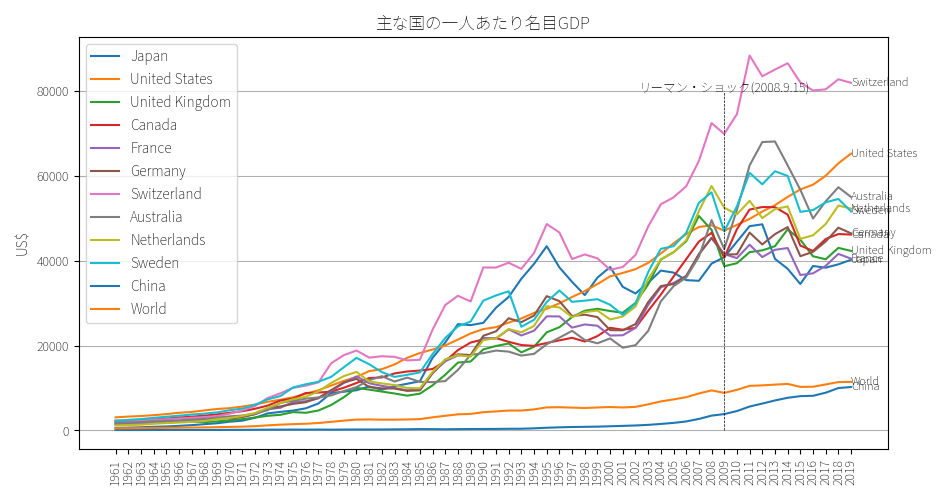

In [26]:
fig = plt.figure(figsize=(9.5,5))
plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("主な国の一人あたり名目GDP")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("US$")
plt.yticks(fontsize=9)
plt.grid(axis="y")
years = chart_data.year.unique()
for c in chart_data["Country Name"].unique():
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"一人あたりGDP"],label=c)
    plt.text(years.max(),chart_data.loc[(chart_data["Country Name"]==c) & (chart_data.year==years.max()),"一人あたりGDP"],c,fontsize=8, va="center")
plt.plot(years, world_gdp["一人あたりGDP"],label=world_gdp["Country Name"].unique()[0])
plt.text(years.max(), world_gdp.loc[world_gdp.year==years.max(),"一人あたりGDP"],world_gdp["Country Name"].unique()[0],fontsize=8,va="center")
plt.plot(["2009","2009"],[10,80000], 'k--', lw=0.5)
plt.text("2009",80000,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.legend()
fig.tight_layout()

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("一人あたり名目GDP TOP10 前年伸び率")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("%")
plt.yticks(fontsize=9)
plt.ylim(-25,25)
plt.grid(axis="y")
years = chart_data.year.unique()
for c in chart_data["Country Name"].unique():
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"前年比"]*100,label=c)
    plt.text(years.max(),chart_data.loc[(chart_data["Country Name"]==c) & (chart_data.year==years.max()),"前年比"],c,fontsize=8, va="center")
plt.plot(years, world_gdp["前年比"],label=world_gdp["Country Name"].unique()[0])
plt.text(years.max(), world_gdp.loc[world_gdp.year==years.max(),"前年比"]*100,world_gdp["Country Name"].unique()[0],fontsize=8,va="center")
#for c in gdp_top10_c["Country Name"]:
#    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"前年比"]*100,label=c)
plt.plot(["2009","2009"],[-1,1], 'k--', lw=0.5)
plt.text("2009",1,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.legend()

fig.tight_layout()